## Importieren der Module

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path  
import glob
from nltk.tag import pos_tag

-----------

## Pfad einlesen

In [3]:
while True: 
    input_path = input("Was soll untersucht werden? allwords, nouns, adjectives oder verbs?").lower()
    
    if input_path == "allwords":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/cleaned_all_docs"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\cleaned_all_docs"]
        break
    elif input_path == "nouns":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/cleaned_all_docs"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\cleaned_all_docs"]
        break
    elif input_path == "verbs":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/cleaned_all_docs"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\cleaned_all_docs"]
        break
    elif input_path == "adjectives":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/cleaned_all_docs"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\cleaned_all_docs"]
        break
    else: 
        print("Falsche Eingabe!")

text_files = []
for path in directory_path:
    text_files.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files))
text_files[:10]

Was soll untersucht werden? allwords, nouns, adjectives oder verbs? allwords


130


['C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\00_preface_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter01_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter01_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter02_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter02_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter03_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter03_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\cleaned_all_docs\\chapter04_buch01.txt',
 'C:\\Users\\Simon\\Bac

In [11]:
#text_files = glob.glob(f"{directory_path}/*.txt")
#text_files[:10]

In [4]:
text_titles = [Path(text).stem for text in text_files]
text_titles[:10]

['00_preface_buch01',
 'chapter01_buch01',
 'chapter01_buch02',
 'chapter02_buch01',
 'chapter02_buch02',
 'chapter03_buch01',
 'chapter03_buch02',
 'chapter04_buch01',
 'chapter04_buch02',
 'chapter05_buch01']

--------------

## TF-IDF berechnen

In [5]:
tfidf_vectorizer = TfidfVectorizer(input='filename')

In [6]:
tfidf_vector = tfidf_vectorizer.fit_transform(text_files)

In [7]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())

In [8]:
if input_path in ("allwords", "nouns"):
    tfidf_slice = tfidf_df[['immigration', 'illegal']]
    print(tfidf_slice.sort_index().round(decimals=2))
else:
    print("Keine Substantive enthalten!")

                                                    immigration  illegal
00_preface_buch01                                          0.00     0.00
Donald Trump & Mike Pence Rally Speech Transcri...         0.00     0.00
Donald Trump Addresses NRA Meeting in Indianapo...         0.00     0.01
Donald Trump Alamo, Texas Speech Transcript Jan...         0.08     0.09
Donald Trump CPAC 2021 Speech Transcript 02_28_21          0.03     0.06
...                                                         ...      ...
chapter12_buch02                                           0.00     0.00
chapter13_buch02                                           0.00     0.00
chapter14_buch02                                           0.00     0.00
chapter15_buch02                                           0.00     0.00
epilogue_buch02                                            0.00     0.00

[130 rows x 2 columns]


In [9]:
tfidf_df.stack().reset_index()

,level_0,level_1,0
0,00_preface_buch01,aa,0.0
1,00_preface_buch01,aah,0.0
2,00_preface_buch01,aback,0.0
3,00_preface_buch01,abandon,0.0
4,00_preface_buch01,abandoned,0.0
...,...,...,...
2299695,Tucker on X Debate Night Interview with Donald...,zuckerberg,0.0
2299696,Tucker on X Debate Night Interview with Donald...,zuckerman,0.0
2299697,Tucker on X Debate Night Interview with Donald...,zulu,0.0
2299698,Tucker on X Debate Night Interview with Donald...,élan,0.0


In [10]:
tfidf_df = tfidf_df.stack().reset_index()

In [11]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document','level_1': 'term', 'level_2': 'term'})

In [12]:
tfidf_df.columns

Index(['document', 'term', 'tfidf'], dtype='object')

In [13]:
tfidf_df.sort_values(by=['tfidf','document'], ascending=[False,False]).groupby(['tfidf']).head(10)

,document,term,tfidf
206777,chapter06_buch01,propaganda,0.702924
2129528,Trump Speaks After Winning 2024 Iowa Caucuses ...,going,0.569127
380102,chapter11_buch01,jew,0.542117
257483,chapter07_buch02,meeting,0.506436
1792,00_preface_buch01,born,0.498402
...,...,...,...
1627485,epilogue_buch02,abandoning,0.000000
1627486,epilogue_buch02,abandonment,0.000000
1627487,epilogue_buch02,abbot,0.000000
1627488,epilogue_buch02,abbott,0.000000


In [14]:
top_tfidf = tfidf_df.sort_values(by=['document','tfidf'], ascending=[True,False]).groupby(['document']).head(10)

In [15]:
top_tfidf[top_tfidf['term'].str.contains('war')]

,document,term,tfidf
1202319,Donald Trump Rose Garden Press Conference on C...,warp,0.125348
2246019,Trump Town Hall with Hannity 12_5_23 Transcrip...,warming,0.164558
176275,chapter05_buch01,war,0.141058
211655,chapter06_buch01,war,0.098104


---------------

## TF-IDF visualisieren

In [16]:
import altair as alt
import numpy as np

#terme die gesondert mit rotem punkt ausgezeichnet werden
term_list = ['war', 'peace']

#randomness fürs ranking
top_tfidf_plusRand = top_tfidf.copy()
top_tfidf_plusRand['tfidf'] = top_tfidf_plusRand['tfidf'] + np.random.rand(top_tfidf.shape[0])*0.0001

#visualisierungen mit ranking
base = alt.Chart(top_tfidf_plusRand).encode(
    x = 'rank:O',
    y = 'document:N'
).transform_window(
    rank = "rank()",
    sort = [alt.SortField("tfidf", order="descending")],
    groupby = ["document"],
)

#heatmap definieren
heatmap = base.mark_rect().encode(
    color = 'tfidf:Q'
)

#roter punkt für oben festgelegte terme definieren
circle = base.mark_circle(size=100).encode(
    color = alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')        
    )
)

#text labels mit weiß für dunklere heatmap-einfärbungen
text = base.mark_text(baseline='middle').encode(
    text = 'term:N',
    color = alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

#visualisierungen darstellen
(heatmap + circle + text).properties(width = 600)

alt.LayerChart(...)

----------------

## Vergleich über anteiliges Wortvorkommen

In [17]:
#für spätere einzelwortanalyse
word_input = input("Bitte das Wort eingeben, das gezählt werden soll: ").lower()

Bitte das Wort eingeben, das gezählt werden soll:  war


#### Hitler

In [18]:
while True: 
    input_path_hitler = input("Was soll untersucht werden? allwords, nouns, adjectives oder verbs?").lower()
    
    if input_path_hitler == "allwords":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_hitler"]
        break
    elif input_path_hitler == "nouns":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_hitler"]
        break
    elif input_path_hitler == "verbs":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_hitler"]
        break
    elif input_path_hitler == "adjectives":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_hitler"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_hitler"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_hitler = []
for path in directory_path:
    text_files_hitler.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_hitler))
text_files_hitler[:10]

Was soll untersucht werden? allwords, nouns, adjectives oder verbs? allwords


29


['C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\00_preface_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter01_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter01_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter02_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter02_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter03_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter03_buch02.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_hitler\\chapter04_buch01.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\

In [19]:
import os

texts_all_hitler = []

# Durchlaufen aller Textdateien und Einlesen des Inhalts
for file_path in text_files_hitler:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        texts_all_hitler.append(content)

# Anzahl der gefundenen und eingelesenen Textdateien ausgeben
print(f"Anzahl der Textdateien: {len(texts_all_hitler)}")

# Alle Texte in ein einzelnes Dokument zusammenfassen und in Wörter aufteilen
texts_all_hitler = ' '.join(texts_all_hitler)
wordlist_hitler = texts_all_hitler.split()

# Gesamtlänge des Textes (in Wörtern) ausgeben
print(f"Gesamte Anzahl der Wörter: {len(wordlist_hitler)}")
print(wordlist_hitler[:40])

Anzahl der Textdateien: 29
Gesamte Anzahl der Wörter: 124310
['april', 'ist', 'began', 'serve', 'sentence', 'detention', 'fortress', 'landsberg', 'lech', 'following', 'verdict', 'pronounced', 'munich', 'people’s', 'court', 'day', 'year', 'uninterrupted', 'labour', 'possible', 'first', 'time', 'begin', 'work', 'many', 'asked', 'felt', 'would', 'profitable', 'movement', 'therefore', 'decided', 'devote', 'two', 'volume', 'description', 'aim', 'movement', 'also', 'development']


In [20]:
from collections import Counter

# Wörter zählen
count_words_hitler = Counter(wordlist_hitler)

mfw_hitler = count_words_hitler.most_common(20) #mfw = most frequent words
for word_h, count_h in mfw_hitler:
    print(f"{word_h}: {count_h}, {round(count_h/(len(wordlist_hitler)),5)}")

people: 985, 0.00792
would: 960, 0.00772
state: 884, 0.00711
one: 868, 0.00698
german: 861, 0.00693
must: 698, 0.00561
time: 659, 0.0053
nation: 576, 0.00463
could: 560, 0.0045
movement: 558, 0.00449
national: 484, 0.00389
even: 470, 0.00378
political: 423, 0.0034
first: 416, 0.00335
may: 411, 0.00331
party: 401, 0.00323
great: 366, 0.00294
way: 365, 0.00294
new: 362, 0.00291
world: 354, 0.00285


In [21]:
#word_hitler = input("Bitte das Wort eingeben, das gezählt werden soll: ").lower()

#worteingabe zählen lassen, ciw = count input word
ciw_hitler = wordlist_hitler.count(word_input)

# Ergebnis ausgeben
print(f"Häufigkeit von'{word_input}' bei Trump: {count_h} mal mit einer Frequenz von {round(count_h/(len(wordlist_hitler)),6)}")

Häufigkeit von'war' bei Trump: 354 mal mit einer Frequenz von 0.002848


#### Trump

In [22]:
while True: 
    input_path_trump = input("Was soll untersucht werden? allwords, nouns, adjectives oder verbs?").lower()
    
    if input_path_trump == "allwords":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/all_words/clean_trump"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\all_words\clean_trump"]
        break
    elif input_path_trump == "nouns":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/nouns/clean_trump"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\nouns\clean_trump"]
        break
    elif input_path_trump == "verbs":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/verbs/clean_trump"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\verbs\clean_trump"]
        break
    elif input_path_trump == "adjectives":
        #directory_path = ["/home/simon/bachelorarbeit/vergleich_mk_trump/cleaned_docs/adjectives/clean_trump"]
        directory_path = [r"C:\Users\Simon\Bachelorarbeit\vergleich_mk_trump\cleaned_docs\adjectives\clean_trump"]
        break
    else: 
        print("Falsche Eingabe!")

text_files_trump = []
for path in directory_path:
    text_files_trump.extend(glob.glob(f"{path}/*.txt"))

print(len(text_files_trump))
text_files_trump[:10]

Was soll untersucht werden? allwords, nouns, adjectives oder verbs? allwords


102


['C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Donald Trump & Mike Pence Rally Speech Transcript Traverse City, Michigan 2 November 11_02_20.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Donald Trump Addresses NRA Meeting in Indianapolis Transcript 04_17_23.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Donald Trump Alamo, Texas Speech Transcript January 12 25th Amendment Zero Risk to Me 01_12_21.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Donald Trump Concedes Election, Condemns Rioters Video Speech Transcript January 7 01_07_21.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Donald Trump CPAC 2021 Speech Transcript 02_28_21.txt',
 'C:\\Users\\Simon\\Bachelorarbeit\\vergleich_mk_trump\\cleaned_docs\\all_words\\clean_trump\\Dona

In [23]:
import os

texts_all_trump = []

# Durchlaufen aller Textdateien und Einlesen des Inhalts
for file_path in text_files_trump:
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
        texts_all_trump.append(content)

# Anzahl der gefundenen und eingelesenen Textdateien ausgeben
print(f"Anzahl der Textdateien: {len(texts_all_trump)}")

# Alle Texte in ein einzelnes Dokument zusammenfassen und in Wörter aufteilen
texts_all_trump = ' '.join(texts_all_trump)
wordlist_trump = texts_all_trump.split()

# Gesamtlänge des Textes (in Wörtern) ausgeben
print(f"Gesamte Anzahl der Wörter: {len(wordlist_trump)}")
print(wordlist_trump[:40])

Anzahl der Textdateien: 102
Gesamte Anzahl der Wörter: 359831
['oh', 'thank', 'oh', 'wow', 'big', 'crowd', 'lot', 'big', 'crowd', 'big', 'crowd', 'great', 'thank', 'much', 'hello', 'traverse', 'city', 'hello', 'michigan', 'want', 'result', 'four', 'year', 'ago', 'michigan', 'right', 'fulfilled', 'promise', 'auto', 'plant', 'many', 'one', 'year', 'going', 'going', 'fast', 'know', 'nobody', 'complaining', 'tell']


In [24]:
from collections import Counter

# Wörter zählen
count_words_trump = Counter(wordlist_trump)

mfw_trump = count_words_trump.most_common(20) #mfw = most frequent words
for word_t, count_t in mfw_trump:
    print(f"{word_t}: {count_t}, {round(count_t/(len(wordlist_trump)),6)}")

going: 5337, 0.014832
people: 4772, 0.013262
said: 4010, 0.011144
know: 3715, 0.010324
country: 3670, 0.010199
want: 3372, 0.009371
like: 3082, 0.008565
great: 3081, 0.008562
one: 2834, 0.007876
say: 2625, 0.007295
think: 2608, 0.007248
right: 2483, 0.0069
get: 2477, 0.006884
got: 2264, 0.006292
never: 2218, 0.006164
would: 2184, 0.00607
year: 2117, 0.005883
thing: 2116, 0.005881
go: 1979, 0.0055
thank: 1839, 0.005111


In [25]:
#word_trump = input("Bitte das Wort eingeben, das gezählt werden soll: ").lower()

#worteingabe zählen lassen, ciw = count input word
ciw_trump = wordlist_trump.count(word_input)

# Ergebnis ausgeben
print(f"Häufigkeit von '{word_input}' bei Trump: {count_t} mal mit einer Frequenz von {round(count_t/(len(wordlist_trump)),6)}")

Häufigkeit von 'war' bei Trump: 1839 mal mit einer Frequenz von 0.005111


#### Corpora zum Vergleich

In [26]:
import nltk
from nltk.corpus import brown, reuters, gutenberg, inaugural, webtext, nps_chat

#corpora herunterladen
"""nltk.download('brown')
nltk.download('reuters')
nltk.download('gutenberg')
nltk.download('inaugural')
nltk.download('webtext')
nltk.download('wordnet')
nltk.download('nps_chat')"""

#berechnung der wortfrequenz und prozentualer anteil im corpus
def get_word_statistics(corpus, word):
    words = corpus.words()
    total_words = len(words)  # Hier verschieben, um sicherzustellen, dass total_words definiert ist
    word_count = words.count(word.lower())
    frequency_percentage = (word_count / total_words) * 100
    return word_count, frequency_percentage, total_words



#liste der corpora
corpora = {
    'Brown': brown,
    'Reuters': reuters,
    'Gutenberg': gutenberg,
    'Inaugural': inaugural,
    'Web Text': webtext,
    'NPS Chat': nps_chat,
}

print(f"Häufigkeit von '{word_input}' bei Hitler: {count_h} mal mit einer Frequenz von {round(count_h/(len(wordlist_hitler)),6)}, bei einer Corpusgröße von {len(wordlist_hitler)} Wörtern")
print(f"Häufigkeit von '{word_input}' bei Trump: {count_t} mal mit einer Frequenz von {round(count_t/(len(wordlist_trump)),6)}, bei einer Corpusgröße von {len(wordlist_trump)} Wörtern")

#worthäufigkeit in jedem corpus + corpuslänge
for corpus_name, corpus in corpora.items():
    word_count, frequency_percentage, total_words = get_word_statistics(corpus, word_input)
    print(f"Häufigkeit von '{word_input}' in {corpus_name} Corpus: {word_count} mal mit einer Frequenz von {frequency_percentage:.6f}%, bei einer Corpusgröße von {total_words} Wörtern")


Häufigkeit von 'war' bei Hitler: 354 mal mit einer Frequenz von 0.002848, bei einer Corpusgröße von 124310 Wörtern
Häufigkeit von 'war' bei Trump: 1839 mal mit einer Frequenz von 0.005111, bei einer Corpusgröße von 359831 Wörtern
Häufigkeit von 'war' in Brown Corpus: 305 mal mit einer Frequenz von 0.026266%, bei einer Corpusgröße von 1161192 Wörtern
Häufigkeit von 'war' in Reuters Corpus: 157 mal mit einer Frequenz von 0.009123%, bei einer Corpusgröße von 1720901 Wörtern
Häufigkeit von 'war' in Gutenberg Corpus: 440 mal mit einer Frequenz von 0.016784%, bei einer Corpusgröße von 2621613 Wörtern
Häufigkeit von 'war' in Inaugural Corpus: 164 mal mit einer Frequenz von 0.107259%, bei einer Corpusgröße von 152901 Wörtern
Häufigkeit von 'war' in Web Text Corpus: 9 mal mit einer Frequenz von 0.002269%, bei einer Corpusgröße von 396733 Wörtern
Häufigkeit von 'war' in NPS Chat Corpus: 0 mal mit einer Frequenz von 0.000000%, bei einer Corpusgröße von 45010 Wörtern


In [27]:
import requests

word_to_find = 'war'
start_year = 1900
end_year = 2019 #max jahr der daten: 2019
corpus = 'eng_2012'

#URL der Google Ngram Viewer API
url = f"https://books.google.com/ngrams/json?content={word_to_find}&year_start={start_year}&year_end={end_year}&corpus={corpus}&smoothing=3"

#request an url
response = requests.get(url)

#daten verarbeieten
if response.status_code == 200:
    data = response.json()
    if data:
        frequency_data = data[0]['timeseries']
        years = list(range(start_year, end_year + 1))
        
        #jahr und häufigkeit kombinieren lassen
        year_frequency_pairs = list(zip(years, frequency_data))

        print(f'Gesamtdurchschnitt aller Jahre: {sum(frequency_data)/len(frequency_data)}')

        print()
        
        #jahr + häufigkeit ausgeben
        for year, frequency in year_frequency_pairs:
            print(f"{year}: {frequency}")

        print()
        
        #altnerativ: als liste
        #print(year_frequency_pairs)
    else:
        print(f"No data found for '{word_to_find}'")
else:
    print(f"Error: {response.status_code}")


Gesamtdurchschnitt aller Jahre: 0.00021036410720914742

1900: 0.00016980930740828626
1901: 0.00016843236808199434
1902: 0.00016498456534463912
1903: 0.00016021027113310993
1904: 0.0001504118720601712
1905: 0.000143774101161398
1906: 0.00013716695788649043
1907: 0.00013416733002356653
1908: 0.00012741384229489734
1909: 0.0001226956696232914
1910: 0.00012116676537386541
1911: 0.00013065936426366015
1912: 0.00016026365171585764
1913: 0.00019425051868893206
1914: 0.0002470020657970703
1915: 0.00032549702362822633
1916: 0.000388457729838722
1917: 0.00042650639079511166
1918: 0.0004445398683726255
1919: 0.0004364985382250909
1920: 0.00041898883189008174
1921: 0.0003807876575072961
1922: 0.00031408752589153925
1923: 0.0002637970194752727
1924: 0.00023635902159315134
1925: 0.00021829377302700386
1926: 0.00020609722871865545
1927: 0.00019906446063292345
1928: 0.0001924261180517663
1929: 0.00018983186289135898
1930: 0.00018518753183473433
1931: 0.0001835686167136633
1932: 0.00018183109101041088


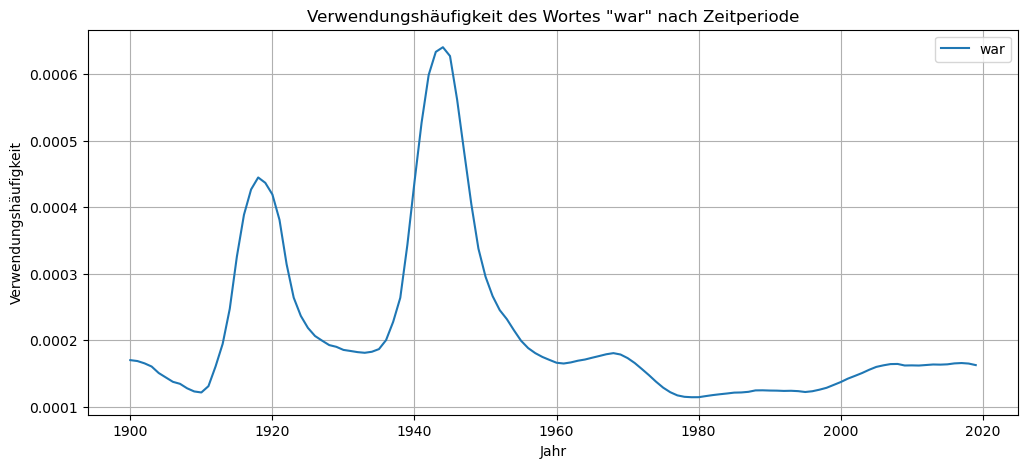

In [28]:
import requests
import matplotlib.pyplot as plt

word_to_find = 'war'
start_year = 1900
end_year = 2019 #max jahr der daten: 2019
corpus = 'eng_2012'

#URL der Google Ngram Viewer API
url = f"https://books.google.com/ngrams/json?content={word_to_find}&year_start={start_year}&year_end={end_year}&corpus={corpus}&smoothing=3"

#request an url
response = requests.get(url)

#daten verarbeieten und zeichnen
if response.status_code == 200:
    data = response.json()
    if data:
        frequency_data = data[0]['timeseries']
        years = list(range(start_year, end_year + 1))

        # Plot erstellen
        plt.figure(figsize=(12, 5))
        plt.plot(years, frequency_data, label=word_to_find)
   
        plt.xlabel('Jahr')
        plt.ylabel('Verwendungshäufigkeit')
        plt.title(f'Verwendungshäufigkeit des Wortes "{word_to_find}" nach Zeitperiode')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for '{word_to_find}'")
else:
    print(f"Error: {response.status_code}")


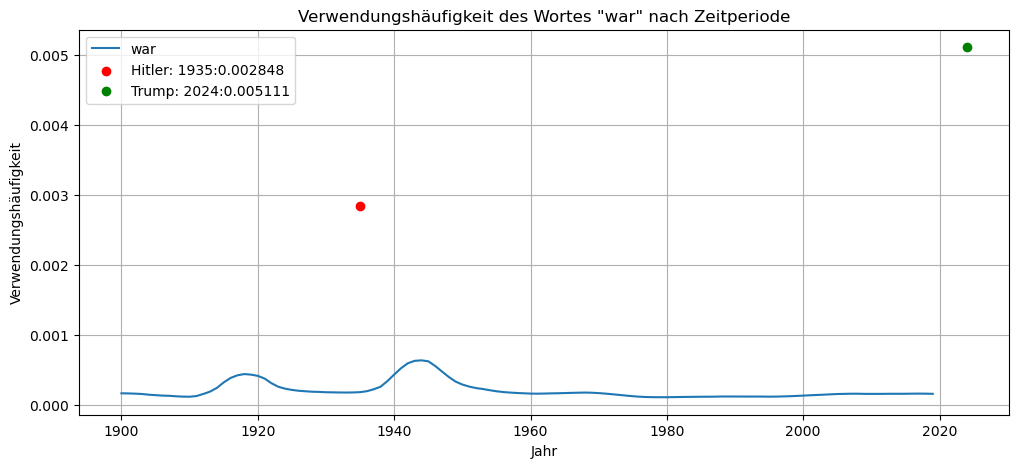

In [29]:
import requests
import matplotlib.pyplot as plt

word_to_find = 'war'
start_year = 1900
end_year = 2019 #max jahr der daten: 2019
corpus = 'eng_2012'

#URL der Google Ngram Viewer API
url = f"https://books.google.com/ngrams/json?content={word_to_find}&year_start={start_year}&year_end={end_year}&corpus={corpus}&smoothing=3"

#request an url
response = requests.get(url)

#daten verarbeieten und zeichnen
if response.status_code == 200:
    data = response.json()
    if data:
        frequency_data = data[0]['timeseries']
        years = list(range(start_year, end_year + 1))

        # Plot erstellen
        plt.figure(figsize=(12, 5))
        plt.plot(years, frequency_data, label=word_to_find)

        year_hitler = 1935
        frequency_hitler = round(count_h/(len(wordlist_hitler)),6)
        plt.scatter(year_hitler, frequency_hitler, color='red', label=f'Hitler: {year_hitler}:{frequency_hitler}', zorder=5)

        year_trump = 2024
        frequency_trump = round(count_t/(len(wordlist_trump)),6)
        plt.scatter(year_trump, frequency_trump, color='green', label=f'Trump: {year_trump}:{frequency_trump}', zorder=5)
        
        
        plt.xlabel('Jahr')
        plt.ylabel('Verwendungshäufigkeit')
        plt.title(f'Verwendungshäufigkeit des Wortes "{word_to_find}" nach Zeitperiode')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for '{word_to_find}'")
else:
    print(f"Error: {response.status_code}")


------------------

## N-Gramme finden und filtern

In [30]:
print(wordlist_hitler[:10])
print(wordlist_trump[:10])

['april', 'ist', 'began', 'serve', 'sentence', 'detention', 'fortress', 'landsberg', 'lech', 'following']
['oh', 'thank', 'oh', 'wow', 'big', 'crowd', 'lot', 'big', 'crowd', 'big']


#### Hitler

In [31]:
# Erstelle Bigrams aus den Token
bigrams = list(nltk.bigrams(wordlist_hitler))

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_n_bigrams = sorted_bigrams[:20]

# Ausgabe mit Platzierung
for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
    print(f'{idx}. {bigram}, {count} mal')

1. ('national', 'socialist'), 137 mal
2. ('german', 'people'), 98 mal
3. ('broad', 'mass'), 75 mal
4. ('german', 'nation'), 71 mal
5. ('foreign', 'policy'), 71 mal
6. ('point', 'view'), 62 mal
7. ('one', 'day'), 61 mal
8. ('looked', 'upon'), 52 mal
9. ('german', 'reich'), 48 mal
10. ('take', 'place'), 44 mal
11. ('one', 'another'), 44 mal
12. ('first', 'time'), 43 mal
13. ('mass', 'people'), 42 mal
14. ('attitude', 'towards'), 42 mal
15. ('state', 'affair'), 40 mal
16. ('even', 'though'), 40 mal
17. ('socialist', 'movement'), 39 mal
18. ('volkisch', 'state'), 39 mal
19. ('hundred', 'thousand'), 36 mal
20. ('new', 'movement'), 33 mal


In [32]:
# Erstelle Bigrams aus den Token
bigrams_hitler = list(nltk.bigrams(wordlist_hitler))

# Filtere Bigrams nach Wortart-Kombinationen
valid_bigrams = []
for bigram in bigrams_hitler:
    # Bestimme die Wortart-Tags
    tagged_bigram = pos_tag(bigram)
    
    # Filtere nach gewünschten Kombinationen
    if (tagged_bigram[0][1] in ['JJ', 'NN'] and tagged_bigram[1][1] in ['NN', 'JJ']) or \
       (tagged_bigram[0][1] in ['NN'] and tagged_bigram[1][1] in ['VB']):
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_10_bigrams = sorted_bigrams[:50]

# Drucke die Top-10-Bigrams
for bigram, count in top_10_bigrams:
    print(bigram, count)


('national', 'socialist') 137
('broad', 'mass') 75
('german', 'nation') 71
('foreign', 'policy') 71
('point', 'view') 62
('german', 'reich') 48
('first', 'time') 43
('state', 'affair') 40
('socialist', 'movement') 39
('volkisch', 'state') 39
('new', 'movement') 33
('german', 'labour') 32
('storm', 'detachment') 32
('german', 'element') 31
('individual', 'state') 31
('political', 'party') 30
('social', 'democratic') 29
('labour', 'party') 28
('public', 'opinion') 28
('national', 'community') 27
('bourgeois', 'party') 26
('world', 'war') 25
('german', 'state') 23
('socialist', 'german') 23
('social', 'democracy') 23
('austrian', 'state') 22
('defence', 'league') 22
('authority', 'state') 21
('fundamental', 'principle') 20
('struggle', 'existence') 20
('great', 'mass') 20
('pangerman', 'movement') 20
('daily', 'bread') 19
('long', 'time') 19
('instinct', 'selfpreservation') 19
('whole', 'nation') 19
('rest', 'world') 19
('policy', 'alliance') 19
('federal', 'state') 19
('matter', 'fact') 

In [33]:
# Erstelle Bigrams aus den Token
bigrams_hitler = list(nltk.bigrams(wordlist_hitler))

# Filtere Bigrams nach Wortart-Kombinationen
valid_bigrams = []
for bigram in bigrams_hitler:
    # Bestimme die Wortart-Tags
    tagged_bigram = pos_tag(bigram)
    
    # Filtere nach Adjektiv gefolgt von Nomen
    if tagged_bigram[0][1] == 'JJ' and tagged_bigram[1][1] == 'NN':
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_10_bigrams = sorted_bigrams[:50]

# Drucke die Top-10-Bigrams
for bigram, count in top_10_bigrams:
    print(bigram, count)


('national', 'socialist') 137
('broad', 'mass') 75
('german', 'nation') 71
('foreign', 'policy') 71
('german', 'reich') 48
('first', 'time') 43
('socialist', 'movement') 39
('new', 'movement') 33
('german', 'labour') 32
('german', 'element') 31
('individual', 'state') 31
('political', 'party') 30
('public', 'opinion') 28
('national', 'community') 27
('german', 'state') 23
('social', 'democracy') 23
('austrian', 'state') 22
('fundamental', 'principle') 20
('great', 'mass') 20
('pangerman', 'movement') 20
('daily', 'bread') 19
('long', 'time') 19
('instinct', 'selfpreservation') 19
('whole', 'nation') 19
('federal', 'state') 19
('social', 'democrat') 17
('young', 'movement') 17
('form', 'government') 17
('new', 'territory') 17
('long', 'run') 16
('military', 'service') 16
('intellectual', 'class') 16
('political', 'power') 16
('civil', 'servant') 15
('educational', 'system') 15
('german', 'history') 14
('everyday', 'life') 14
('racial', 'stock') 14
('present', 'time') 14
('mean', 'end') 

In [34]:
#bigrams nach user input
# Abfrage des Benutzereingabe Wortes
user_input_hitler = input("Bitte geben Sie ein Wort ein:")


# Erstelle Bigrams aus den Token
bigrams_hitler = list(nltk.bigrams(wordlist_hitler))

# Filtere Bigrams nach Benutzereingabe
valid_bigrams = []
for bigram in bigrams_hitler:
    if user_input_hitler in bigram[0] or user_input_hitler in bigram[1]:
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 20 Bigrams
top_n_bigrams = sorted_bigrams[:20]

# Drucke die Top-20-Bigrams
for bigram, count in top_n_bigrams:
    print(bigram, count)


Bitte geben Sie ein Wort ein: war


('attitude', 'towards') 42
('world', 'war') 25
('put', 'forward') 19
('come', 'forward') 12
('towards', 'end') 11
('war', 'would') 11
('directed', 'towards') 9
('wage', 'war') 9
('even', 'war') 9
('outward', 'appearance') 8
('war', 'propaganda') 8
('war', 'even') 7
('war', 'aim') 7
('war', 'german') 6
('waging', 'war') 6
('lost', 'war') 6
('prewar', 'germany') 6
('looked', 'forward') 5
('hostility', 'towards') 5
('prewar', 'time') 5


#### Trump

In [35]:
# Erstelle Bigrams aus den Token
bigrams_trump = list(nltk.bigrams(wordlist_trump))

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in bigrams_trump:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_n_bigrams = sorted_bigrams[:20]

# Ausgabe mit Platzierung
for idx, (bigram, count) in enumerate(top_n_bigrams, 1):
    print(f'{idx}. {bigram}, {count} mal')

1. ('joe', 'biden'), 639 mal
2. ('thank', 'much'), 605 mal
3. ('united', 'state'), 464 mal
4. ('year', 'ago'), 382 mal
5. ('great', 'job'), 326 mal
6. ('history', 'country'), 324 mal
7. ('radical', 'left'), 315 mal
8. ('make', 'america'), 315 mal
9. ('four', 'year'), 311 mal
10. ('fake', 'news'), 300 mal
11. ('nobody', 'ever'), 280 mal
12. ('lot', 'people'), 277 mal
13. ('new', 'york'), 269 mal
14. ('thank', 'thank'), 253 mal
15. ('said', 'i'), 252 mal
16. ('going', 'win'), 249 mal
17. ('ever', 'seen'), 241 mal
18. ('billion', 'dollar'), 239 mal
19. ('would', 'never'), 236 mal
20. ('crooked', 'joe'), 226 mal


In [36]:
# Erstelle Bigrams aus den Token
bigrams_trump = list(nltk.bigrams(wordlist_trump))

# Filtere Bigrams nach Wortart-Kombinationen
valid_bigrams = []
for bigram in bigrams_trump:
    # Bestimme die Wortart-Tags
    tagged_bigram = pos_tag(bigram)
    
    # Filtere nach gewünschten Kombinationen
    if (tagged_bigram[0][1] in ['JJ', 'NN'] and tagged_bigram[1][1] in ['NN', 'JJ']) or \
       (tagged_bigram[0][1] in ['NN'] and tagged_bigram[1][1] in ['VB']):
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_10_bigrams = sorted_bigrams[:50]

# Drucke die Top-10-Bigrams
for bigram, count in top_10_bigrams:
    print(bigram, count)



KeyboardInterrupt



In [ ]:
# Erstelle Bigrams aus den Token
bigrams_hitler = list(nltk.bigrams(wordlist_hitler))

# Filtere Bigrams nach Wortart-Kombinationen
valid_bigrams = []
for bigram in bigrams_hitler:
    # Bestimme die Wortart-Tags
    tagged_bigram = pos_tag(bigram)
    
    # Filtere nach Adjektiv gefolgt von Nomen
    if tagged_bigram[0][1] == 'JJ' and tagged_bigram[1][1] == 'NN':
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 10 Bigrams
top_10_bigrams = sorted_bigrams[:50]

# Drucke die Top-10-Bigrams
for bigram, count in top_10_bigrams:
    print(bigram, count)


In [ ]:
#bigrams nach user input
# Abfrage des Benutzereingabe Wortes
user_input_trump = input("Bitte geben Sie ein Wort ein:")


# Erstelle Bigrams aus den Token
bigrams_trump = list(nltk.bigrams(wordlist_trump))

# Filtere Bigrams nach Benutzereingabe
valid_bigrams = []
for bigram in bigrams_hitler:
    if user_input_trump in bigram[0] or user_input_trump in bigram[1]:
        valid_bigrams.append(bigram)

# Zähle die Häufigkeit jedes Bigrams
bigram_counts = {}
for bigram in valid_bigrams:
    if bigram in bigram_counts:
        bigram_counts[bigram] += 1
    else:
        bigram_counts[bigram] = 1

# Sortiere die Bigrams nach Häufigkeit
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)

# Nimm die ersten 20 Bigrams
top_n_bigrams = sorted_bigrams[:20]

# Drucke die Top-20-Bigrams
for bigram, count in top_n_bigrams:
    print(bigram, count)
